In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

# Data Preprocessing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:, 1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Explorartory Data Analysis

In [10]:
import matplotlib.pyplot as plt

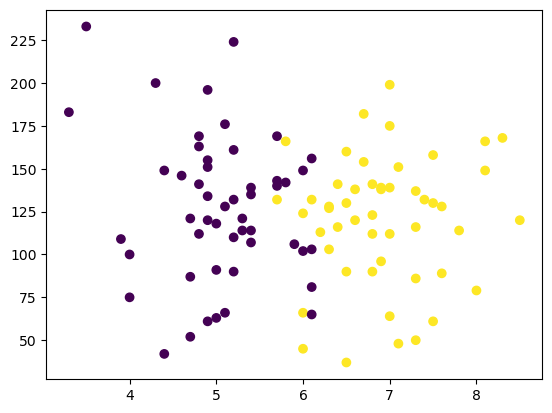

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [13]:
X = df.iloc[:, 0:2]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
Y = df.iloc[:, -1]

In [16]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
X.shape

(100, 2)

In [18]:
Y.shape

(100,)

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [22]:
X_train

,cgpa,iq
70,6.3,127.0
57,6.5,130.0
98,6.3,103.0
47,5.2,161.0
66,6.9,96.0
...,...,...
51,4.8,141.0
71,6.1,132.0
56,6.1,65.0
74,6.7,154.0


In [23]:
X_train.shapepe

(90, 2)

In [24]:
X_test

,cgpa,iq
3,7.4,132.0
59,4.8,112.0
22,4.9,120.0
40,4.9,134.0
73,4.9,61.0
20,6.6,120.0
28,5.2,90.0
0,6.8,123.0
24,4.7,121.0
92,5.2,110.0


In [25]:
X_test.shape

(10, 2)

In [27]:
y_train

70    1
57    1
98    1
47    0
66    1
     ..
51    0
71    1
56    0
74    1
95    0
Name: placement, Length: 90, dtype: int64

In [28]:
y_test

3     1
59    0
22    0
40    0
73    0
20    1
28    0
0     1
24    0
92    0
Name: placement, dtype: int64

In [29]:
y_train.shape

(90,)

In [30]:
y_test.shape

(10,)

# Scaling 

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_train

array([[ 0.22577339,  0.05267996],
       [ 0.4001906 ,  0.12562143],
       [ 0.22577339, -0.53085186],
       [-0.73352128,  0.87935003],
       [ 0.74902503, -0.70104864],
       [-0.12306103, -0.45791039],
       [-1.43119013, -2.01399524],
       [ 0.66181642, -0.8469316 ],
       [ 0.4001906 , -2.13556437],
       [ 0.13856479, -0.28771361],
       [-0.29747825,  0.17424909],
       [ 0.66181642,  0.39307352],
       [ 0.4001906 , -0.8469316 ],
       [-0.55910406,  0.34444587],
       [ 0.83623364,  1.2197436 ],
       [ 0.92344224, -1.86811228],
       [-1.25677292,  0.51464265],
       [ 0.05135618, -0.53085186],
       [-0.73352128,  2.41112106],
       [ 0.83623364, -1.47909107],
       [-0.9951471 ,  1.73033394],
       [-0.21026964,  1.00091916],
       [ 1.27227667, -1.55203255],
       [ 0.92344224,  0.63621178],
       [ 1.35948527, -0.87124543],
       [ 0.22577339,  0.07699378],
       [-1.16956431, -1.77085698],
       [-0.64631267, -0.093203  ],
       [-1.43119013,

In [36]:
X_test = scaler.transform(X_test)

In [37]:
X_test

array([[ 1.18506806,  0.17424909],
       [-1.0823557 , -0.31202743],
       [-0.9951471 , -0.11751682],
       [-0.9951471 ,  0.22287674],
       [-0.9951471 , -1.55203255],
       [ 0.48739921, -0.11751682],
       [-0.73352128, -0.8469316 ],
       [ 0.66181642, -0.04457535],
       [-1.16956431, -0.093203  ],
       [-0.73352128, -0.36065508]])

# Model Training

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [41]:
clf.fit(X_train, y_train)

LogisticRegression()

In [42]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [43]:
y_test

3     1
59    0
22    0
40    0
73    0
20    1
28    0
0     1
24    0
92    0
Name: placement, dtype: int64

In [45]:
y_pred = clf.predict(X_test)

# Accuracy Score 

In [44]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, y_pred)

1.0

# Decision Boundaries

In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

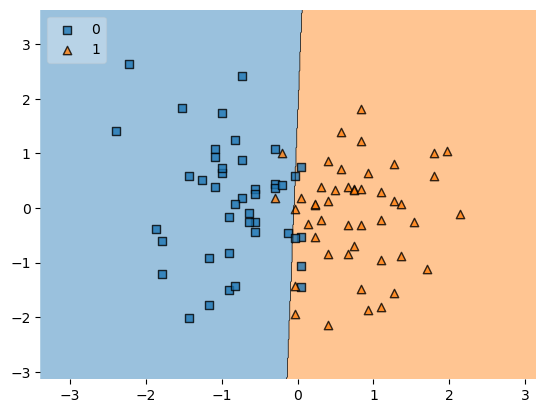

In [48]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

# Model Deploy

In [50]:
import pickle 


In [51]:
# Python everything is Object

In [53]:
pickle.dump(clf, open('modelll.pkl', 'wb'))